<img src="https://storage.googleapis.com/kaggle-datasets-images/5879958/9631437/60fabd7c0105f7b27eea184ecc06a8ad/dataset-cover.png?t=2024-10-15-12-31-51" 
     width="700px" height="400px"/>  

📌 *Image source:* [TMDB Logos & Attribution](https://www.themoviedb.org/about/logos-attribution)


# 🎬 **Exploratory Data Analysis of the Movie Database**  
### 📊 **Analysis Conducted by: Victor Adeyemi**  

---

## 🔍 **Overview**
This analysis explores patterns, trends, and insights within the movie industry using the TMDB dataset. This is done through examining budget, revenue, genres, and temporal trends. The aim is to uncover insights and propose recommendations from the data.

### 📌 **Key Areas of Exploration**
- **🎭 Genre Trends:** Which genres dominate the industry in terms of production and revenue?  
- **📈 Budget vs. Revenue:** Does money buy success?  
- **🎥 Individual Case Studies:** A deep dive into the biggest "high-budget flop" vs. the biggest "low-budget success".  
- **⏳ Temporal Analysis:** How has the film industry evolved since the earliest recordings.  

---

In [41]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import ast

In [42]:
#initialising the dataframe by reading from csv file
df = pd.read_csv('TMDB_movies.csv')

# 📌 USER DEFINED FUNCTIONS FOR EDA PREP

* 1: **'extract_genres()**': Function to **extract individual item's** from data's JSON objects
* 2: **'null_vals()'**: Function to count **missing values** per column and calculate as **total percentage**

In [43]:
def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Genres
    return Genres
## Apply the function to necessary columns
df['genres'] = df['genres'].apply(extract_genres)
df['keywords'] = df['keywords'].apply(extract_genres)
df['production_companies'] = df['production_companies'].apply(extract_genres)
df['production_countries'] = df['production_countries'].apply(extract_genres)
df['spoken_languages'] = df['spoken_languages'].apply(extract_genres)

In [44]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['null_percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('null_percent', ascending=False)

# 📌 DATA CLEANING

In [45]:
#dropping redundant columns
df.drop(columns=['homepage', 'keywords', 'overview', 'tagline'], inplace=True)

In [46]:
#series showing sum of null values across columns
nulls = df.isnull().sum()

In [47]:
#dropping the one record with null release_date as record was fill with redundant data
df.dropna(subset='release_date', inplace=True)

#### 📌 DEALING WITH RUNTIME NULLS
* IDENTIFYING 2 MOVIES with NaN runtime values and replacing them with accurate data from the official [TMDB website](https://www.themoviedb.org/?language=en-GB)

In [48]:
#boolean mask to identify records with null runtime values to allow accurate editing
df[df['runtime'].isna()]

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,[Drama],370980,it,Chiamatemi Francesco - Il Papa della gente,0.738646,[Taodue Film],[Italy],2015-12-03,0,NaN,[Español],Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],459488,en,"To Be Frank, Sinatra at 100",0.050625,[Eyeline Entertainment],[United Kingdom],2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [49]:
#using .loc to identify specific record and alter its 'runtime
df.loc[2656, 'runtime'] = 113.0
df.loc[4140, 'runtime'] = 81.0

# 📊GENRE ANALYSIS
---
* To better understand the distribution and financial performance of different film genres, we will:
    * ✅ Create a new dataset by exploding the original dataset’s genre dictionary column
    * ✅ Count the number of films per genre to visualise the spread
    * ✅ Aggregate total revenue per genre to analyse revenue

In [50]:
#  Expanding the 'genres' column to separate multiple genres into individual rows  
df_exploded = df.explode('genres')

#  Counting occurrences of each genre to determine the number of films per genre  
df_genre_counts = df_exploded['genres'].value_counts().reset_index()

#  Renaming columns for better readability  
df_genre_counts.columns = ['Genre', 'Count']

### 💰 MOST PROFITABLE GENRES (COUNT & REVENUE)

/var/folders/nd/wr_7t3g13y3662d7qgs7v31r0000gn/T/ipykernel_14992/451633147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genre_counts['Genre'], y=df_genre_counts['Count'], palette="flare_r")
/var/folders/nd/wr_7t3g13y3662d7qgs7v31r0000gn/T/ipykernel_14992/451633147.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_revenue,


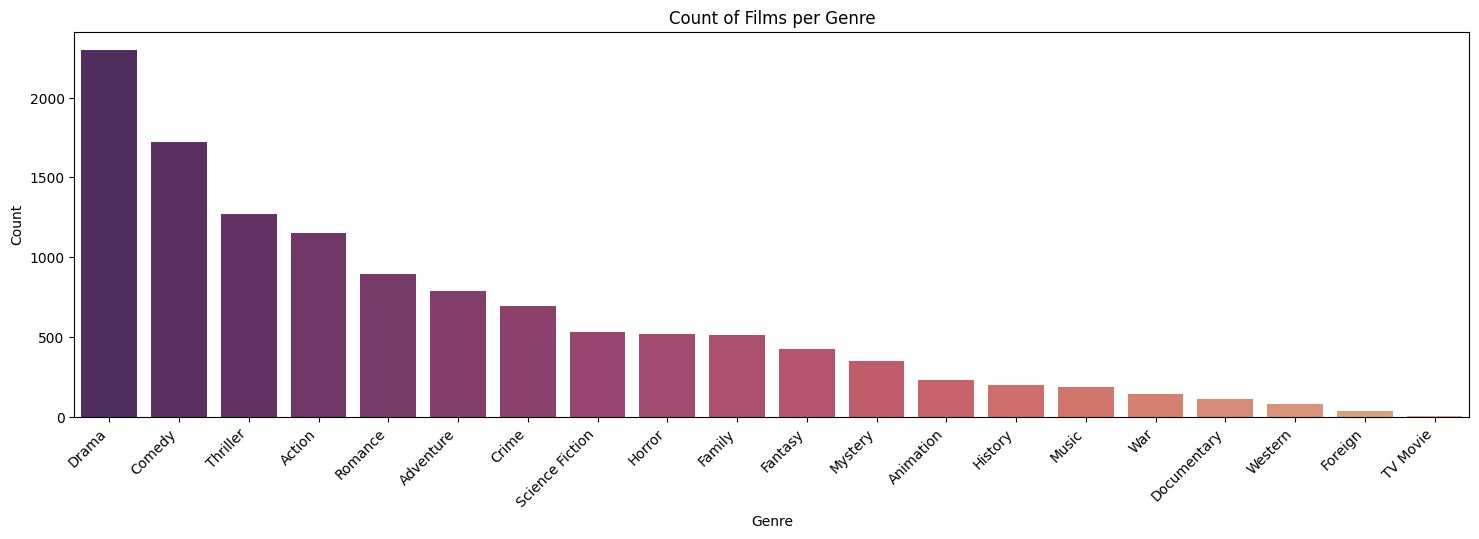

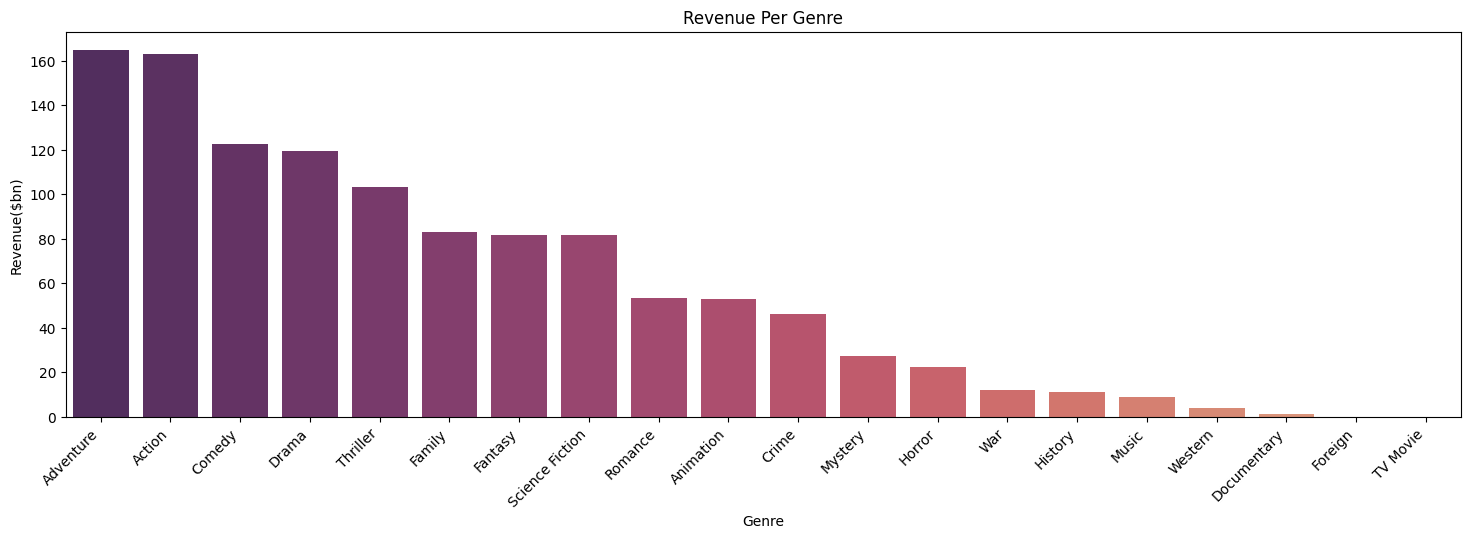

In [51]:
#initialisation of genre count graph
plt.figure(figsize=(18, 5))
sns.barplot(x=df_genre_counts['Genre'], y=df_genre_counts['Count'], palette="flare_r")


plt.xticks(rotation=45, horizontalalignment = 'right')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Count of Films per Genre")

#intialisation of genre revenue graph 
genre_revenue = (df_exploded.groupby('genres')[['revenue']].sum()/1_000_000_000).sort_values(by='revenue', ascending=False)
genre_revenue.head()
plt.figure(figsize=(18,5))
sns.barplot(data=genre_revenue,
            x='genres',
            y='revenue',
            palette='flare_r')


plt.xticks(rotation=45, horizontalalignment = 'right')
plt.xlabel("Genre")
plt.ylabel("Revenue($bn)")
plt.title("Revenue Per Genre")

plt.show()

# 💰BUDGET vs. REVENUE ANALYSIS

---
* Our goal is to explore the relationship between a movie's budget and its revenue, addressing the question:
**"DOES MONEY BUY SUCCESS?"**  

    * ✅To ensure the accuracy of our analysis, we start by removing records with any zero values in the 'budget' or 'revenue' columns to focus on valid entries

    * ✅We’ll then assess the correlation between budget and revenue. The correlation coefficient (R) will help us determine the strength and direction of this relationship. 
    Reference: [Correlation Coefficients & Interpretation](https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx)

    * ✅Explore the outliers and derive unique insights



In [52]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].replace(0, np.nan)
df.dropna(subset=['budget', 'revenue'], how='any', inplace=True)

In [53]:
df[['budget', 'revenue']].isna().sum()

budget     0
revenue    0
dtype: int64

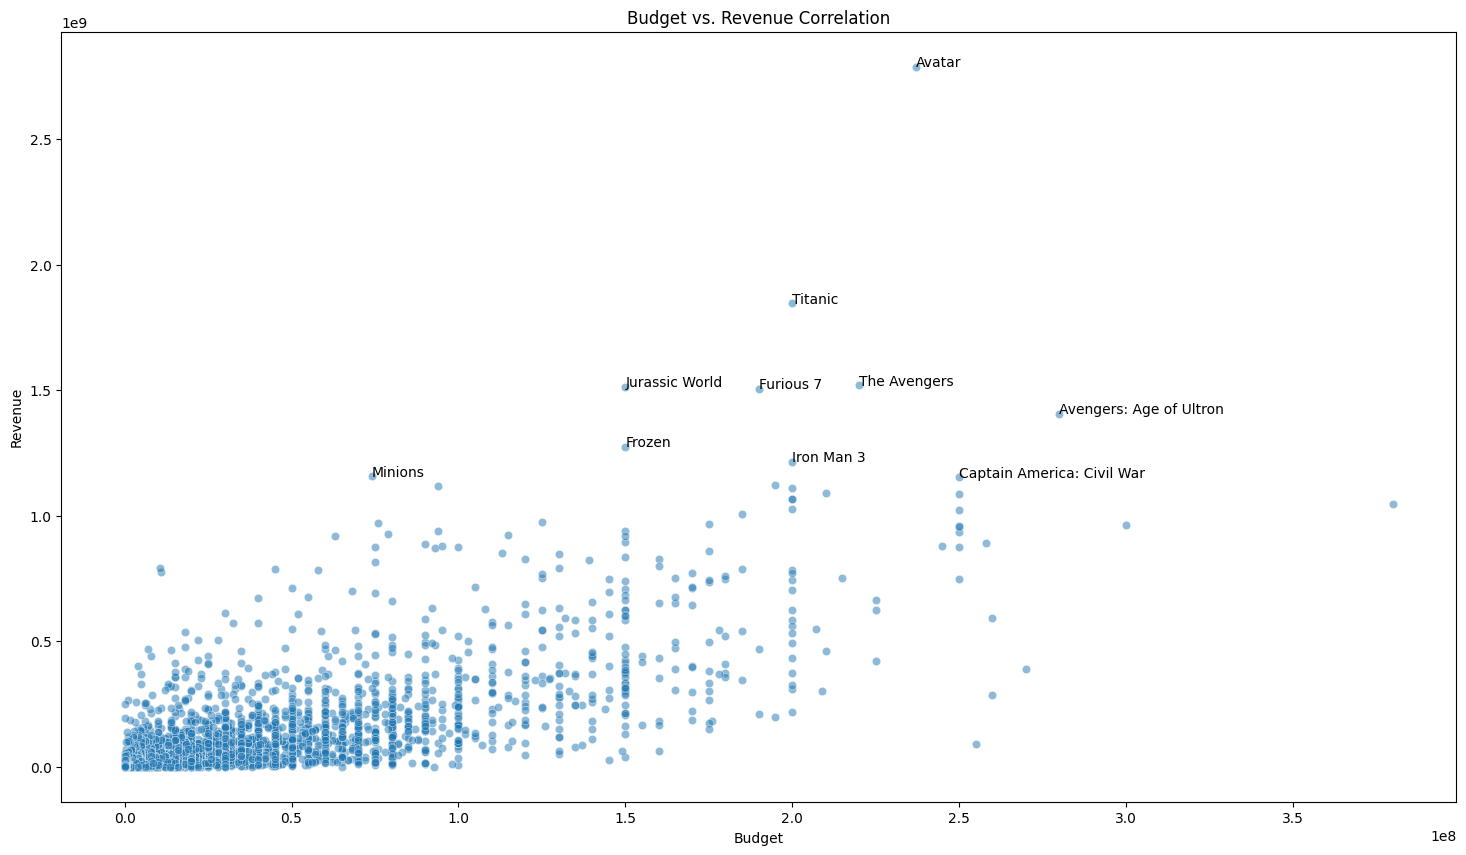

In [54]:
# Select the top 5 highest revenue movies based on the 'revenue' column
top_movies = df.nlargest(10, 'revenue')  # Get the top 10 movies by revenue (can adjust to 5 if needed)

plt.figure(figsize=(18,10))

# Create a scatter plot with 'budget' on the x-axis and 'revenue' on the y-axis, with transparency (alpha) set for clarity
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5)

# Annotate each of the top 5 highest revenue movies with their title
for i, row in top_movies.iterrows():
    plt.text(row['budget'], row['revenue'], str(row['title']), color='black')

# Title and axis labels for the plot
plt.title('Budget vs. Revenue Correlation')  # Set the title of the plot
plt.xlabel('Budget')  # Label the x-axis
plt.ylabel('Revenue')  # Label the y-axis

# Show the plot with all elements
plt.show()

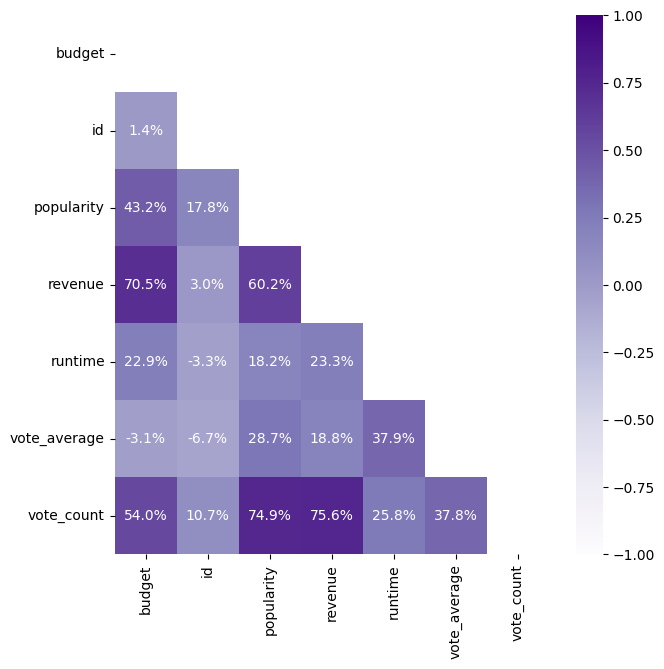

In [55]:
# Select only the numerical columns from the dataframe
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize = (7,7))

# Create a heatmap to visualize the correlation matrix of the numerical data
sns.heatmap(
    numeric_df.corr(numeric_only=True),  # Calculate the correlation matrix for numerical columns
    annot=True,  
    cmap='Purples', 
    fmt='.1%', 
    vmin=-1, 
    vmax=1,
    mask=np.triu(numeric_df.corr(numeric_only=True))  # Mask the upper triangle of the heatmap to avoid duplicate values
)

plt.show()

In [56]:
#boolean mask to explicitly only show correlation between budget and revenue respectively
df[['budget','revenue']].corr(numeric_only=True)

,budget,revenue
budget,1.000000,0.705399
revenue,0.705399,1.000000


### 📊 OUTLIER EXPLORATION

In [57]:
# Set the threshold for budget as the median value of the budget column
budget_threshold = df['budget'].median()

# Set the threshold for revenue as the median value of the revenue column
revenue_threshold = df['revenue'].median()

# Identify low-budget movies that have a revenue greater than the median revenue (success)
low_budget_successes = df[(df['budget'] <= budget_threshold) & (df['revenue'] > revenue_threshold)]

# Identify high-budget movies that have a revenue less than the median revenue (flop)
high_budget_flops = df[(df['budget'] >= budget_threshold) & (df['revenue'] < revenue_threshold)]

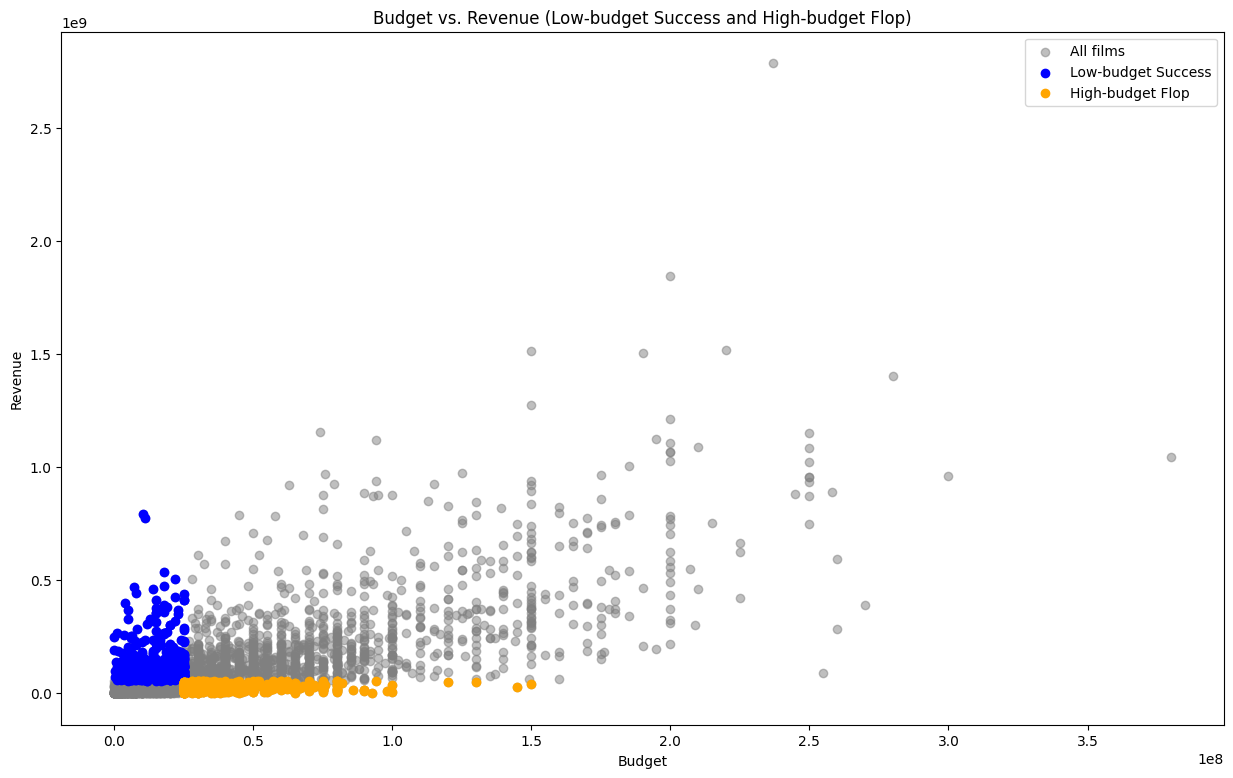

In [58]:
plt.figure(figsize=(15, 9))

plt.scatter(df['budget'], df['revenue'], color='gray', alpha=0.5, label='All films') # This shows the overall distribution of movies based on budget and revenue

plt.scatter(x=low_budget_successes['budget'],
            y=low_budget_successes['revenue'],
            color='blue',
            label='Low-budget Success') # Scatterplot showing low budget successful movies in blue (revenue higher than median despite having budget below threshold)


plt.scatter(x=high_budget_flops['budget'],
            y=high_budget_flops['revenue'],
            color='orange',
            label='High-budget Flop')# Scatterplot showing high budget flops in yellow (revenue lower than median despite having budget above threshold)

#Graph labels/formatting
plt.title('Budget vs. Revenue (Low-budget Success and High-budget Flop)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()

plt.show()

# 📊 IN DEPTH SINGLE OBSERVATION ANALYSIS
---
### BIGGEST HIGH BUDGET FLOP Vs. BIGGEST LOW BUDGET SUCCESS

* In this analysis, we will compare two movies:

     * ✅ **Biggest High-Budget Flop**: 'Flop' category movie with highest revenue

    * ✅ **Biggest Low-Budget Success**: 'Success' category movie with highest revenue



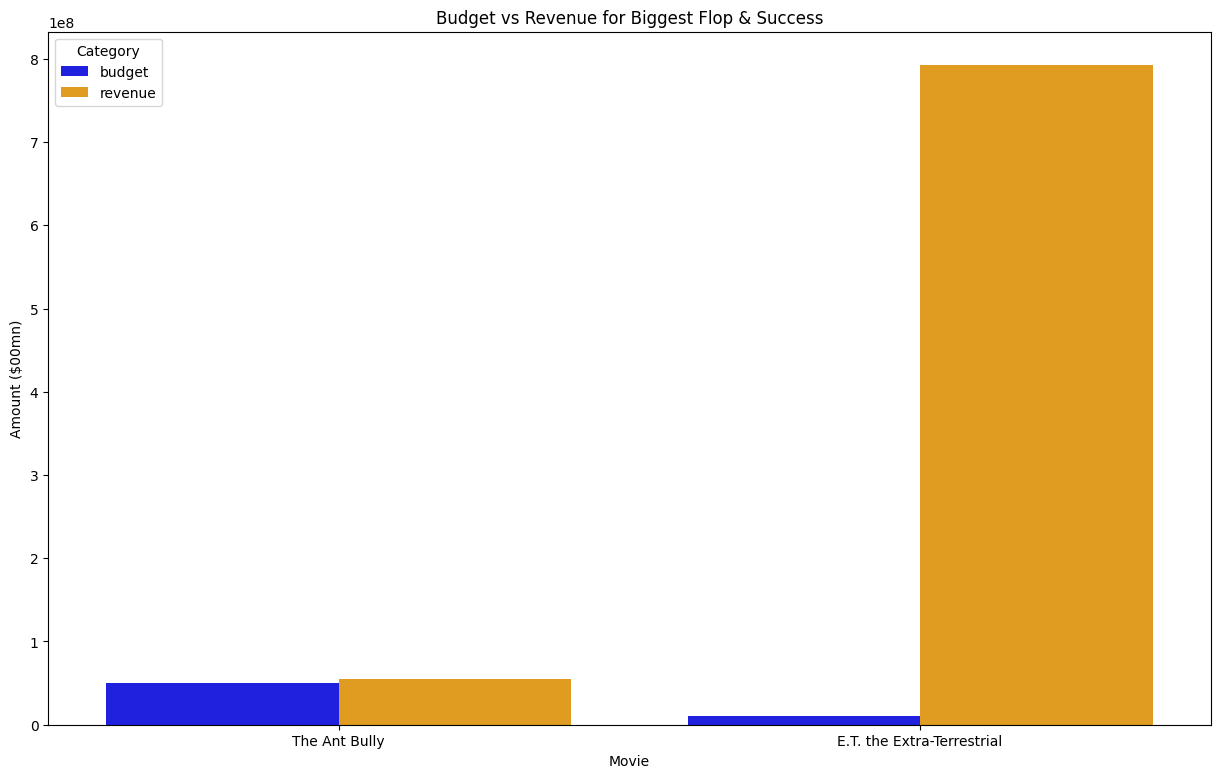

In [59]:
biggest_flop = high_budget_flops.sort_values(by='revenue', ascending=False).head(1)
biggest_success = low_budget_successes.sort_values(by='revenue', ascending=False).head(1)

comparison = pd.concat([biggest_flop, biggest_success], ignore_index=True)

# Reshape Data: Convert wide format to long format
comparison_melted = comparison.melt(id_vars=['title'],
                                    value_vars=['budget', 'revenue'], 
                                    var_name='Category', value_name='Amount')

plt.figure(figsize=(15, 9))
sns.barplot(data=comparison_melted, 
            x='title', 
            y='Amount', 
            hue='Category', 
            palette=['blue', 'orange'])

plt.xlabel("Movie")
plt.ylabel("Amount ($00mn)")
plt.title("Budget vs Revenue for Biggest Flop & Success")
plt.legend(title="Category")

plt.show()

In [60]:
comparison.head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,50000000.0,"[Fantasy, Adventure, Animation, Comedy, Family]",9906,en,The Ant Bully,20.239061,"[Playtone, Warner Bros., Legendary Entertainme...",[United States of America],2006-07-27,55181129.0,88.0,[English],Released,The Ant Bully,5.5,366
1,10500000.0,"[Science Fiction, Adventure, Family, Fantasy]",601,en,E.T. the Extra-Terrestrial,56.105798,"[Universal Pictures, Amblin Entertainment]",[United States of America],1982-04-03,792910554.0,115.0,[English],Released,E.T. the Extra-Terrestrial,7.3,3269


# 📅 TEMPORAL ANALYSIS: TRENDS IN FILM RELEASES OVER TIME
---

### Objective: This analysis examines how the number of film releases has changed over time (1916–2017) to identify key trends in the industry

* Key Considerations:
    * ✅ How has the volume of film production evolved over the decades?

    * ✅ Are there noticeable shifts in trends, such as peaks or declines in movie releases?

    * ✅ How do external factors (e.g., technological advancements, economic downturns, or global events) influence production trends?
        * Influence of [modern trends](https://www.investopedia.com/articles/investing/091615/movie-vs-tv-industry-which-most-profitable.asp) on future results 

In [62]:
df['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4773    1994-09-13
4788    1972-03-12
4792    1997-11-06
4796    2004-10-08
4798    1992-09-04
Name: release_date, Length: 3229, dtype: object

In [63]:
bins = [0, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['<1970', '1970s', '1980s', '1990s', '2000s', '2010s',]
    
df['release_year'] = df['release_date'].str[:4]
df['release_year'] = df['release_year'].astype(int)
df['decade'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=False)

release_decade = df['decade'].value_counts().reset_index()

<Axes: title={'center': 'Number of Releases Per Year'}, xlabel='Release Year', ylabel='Number of Releases'>

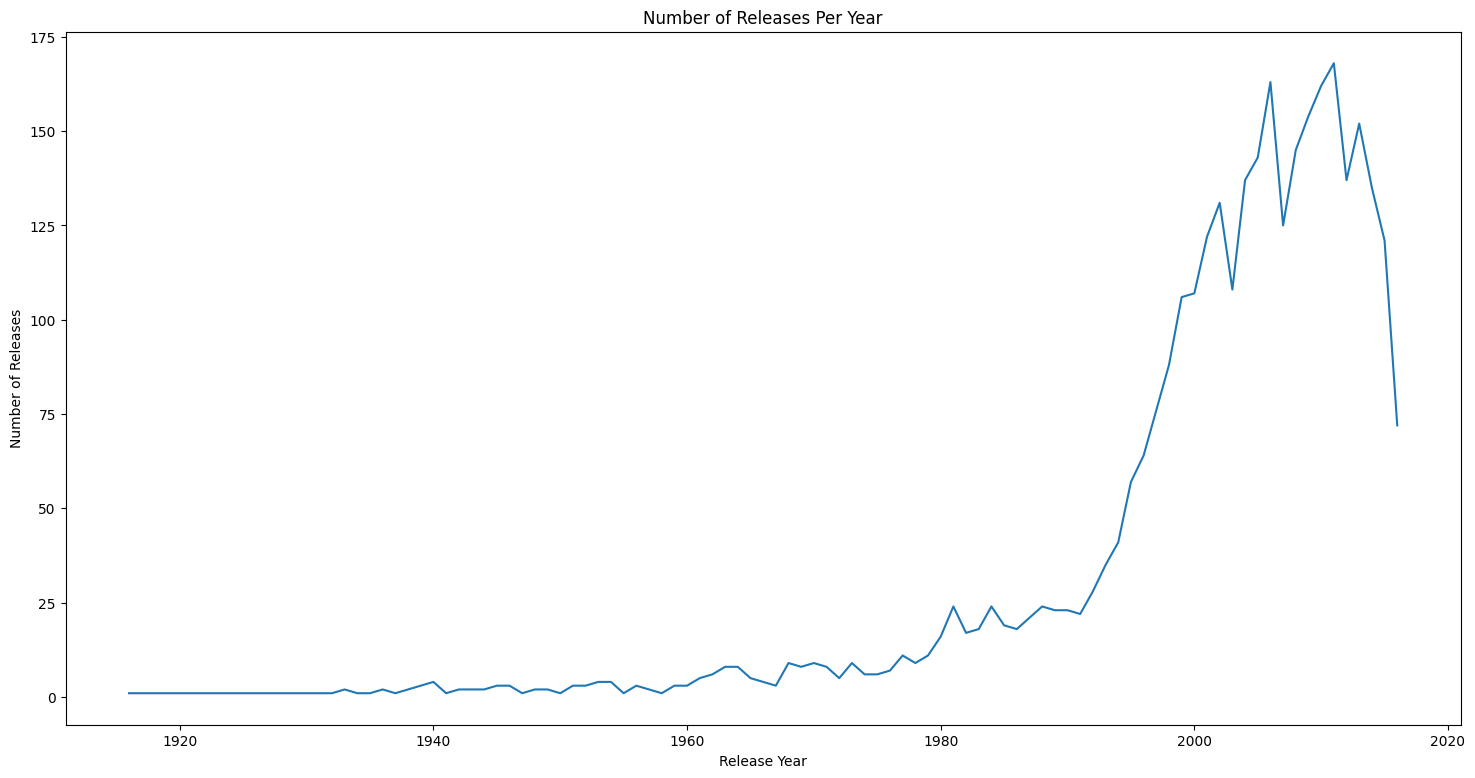

In [64]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(18,9), xlabel='Release Year', ylabel='Number of Releases', title='Number of Releases Per Year')


# 🎬 **End of Exploratory Data Analysis (EDA)**
---
## 🔍 **Key Takeaways**
- **Genre Insights:** Some genres consistently generate higher revenue, while others have a more niche audience appeal.
- **Budget vs. Revenue:** There is a strong positive correlation (𝑟 ≈ 0.7) between budget and revenue, meaning higher budgets often lead to higher revenue—but it is not always a guarantee. Some low-budget films achieve significant success, while high-budget films can still flop.
- **Temporal Trends:** The number of film releases has grown significantly over time, influenced by industry shifts such as the rise of streaming services.
- **Correlation Analysis:** Various factors influence a movie's revenue, but no single variable guarantees success. Popularity and Revenue are strongly correlated

## 📌 **Next Steps**
- Investigate additional factors such as marketing spend, audience ratings, or global box office performance.
- Apply predictive modeling to forecast a movie’s potential success.
- Dive deeper into the impact of streaming platforms on traditional movie revenue.

---